In [4]:
import random
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from Crypto.Util import number
import time
import sys, threading
from math import sqrt,floor

sys.setrecursionlimit(10**7)
threading.stack_size(2**27)




134217728

# Utility functions for RSA

In [5]:

# is prime
def is_prime(n):
    if n == 2:
        return True
    if n % 2 == 0 or n <= 1:
        return False
    for i in range(3, int(n**0.5)+1, 2):
        if n % i == 0:
            return False
    return True

#powmod
def powmod(a, b, c):
    res = 1
    while b > 0:
        if b & 1:
            res = (res * a) % c
        b >>= 1
        a = (a * a) % c
    return res

def ConvertToInt(message_str):
  res = 0
  for i in range(len(message_str)):
    res = res * 256 + ord(message_str[i])
  return res

def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

def GCD(a, b):
  if b == 0:
    return a
  return GCD(b, a % b)

def ExtendedEuclid(a, b):
    if b == 0:
        return (1, 0)
    (x, y) = ExtendedEuclid(b, a % b)
    k = a // b
    return (y, x - k * y)

# this is an R2L recursive implementation that works for large integers
def PowMod(a, n, mod): 
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    else:
        b = PowMod(a, n // 2, mod)
        b = b * b % mod
        if n % 2 == 0:
          return b
        else:
          return b * a % mod

def InvertModulo(a, n):
    (b, x) = ExtendedEuclid(a, n)
    if b < 0:
        b = (b % n + n) % n # we don't want -ve integers
    return b



# REQ1) RSA functions

In [6]:

def RSA(n_bits):
    p = number.getPrime(n_bits // 2)
    q = number.getPrime(n_bits // 2)
    while p == q:
        q = number.getPrime(n_bits // 2)
    n=p*q
    phi=(p-1)*(q-1)
    e=random.randint(2,phi)
    while sp.gcd(e,phi) != 1:
        e=random.randint(2,phi) 

    d=sp.mod_inverse(e,phi)
    pu=e,n
    pr=d,n
    return pu,pr

def Encrypt(message,pu):
    e,n=pu
    return PowMod(message,e,n)

def Decrypt(cipher,pr):
    d,n=pr
    return PowMod(cipher,d,n)
    

# REQ3) RSA     encryption time - nbits

In [12]:
#key generation loop for req3

message="A"
message_int=ConvertToInt(message)

#make x linspace of range 1 to 1024
low=8
end=512
x=np.linspace(low,end,end-low+1)
#print(x[:200])
y=[]

keys=[]
for i in x:
    (e,n),(d,n)=RSA(int(i))
    keys.append((e,n))
    
   


In [13]:
counter=0

for i in x:
    elapsed_time=0
    (e,n)=keys[counter]
    for j in range(100):
        
        st=time.time()
        cipher=Encrypt(message_int,(e,n))
        et=time.time()
        elapsed_time+=(et-st)
    y.append(elapsed_time/100)
    counter+=1
    

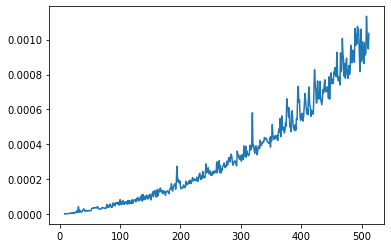

In [14]:
plt.plot(x, y)
plt.show()


# Req4

In [16]:
#break RSA  for req 4
def break_RSA(pu):
    e,n=pu
    #get p,q
    for i in range(2,n//2):
        if n%i==0:
            p=i
            q=n//i
            break
    


    return p,q

(pu,_)=RSA(32)
print(pu)
p,q=break_RSA(pu)
assert(p*q==pu[1])

(2931590437, 3927891697)


In [17]:
#loop to generate keys
keys_to_break=[]

lower_range=8
upper_range=50
for i in range(lower_range,upper_range):
    (e,n),(d,n)=RSA(int(i))
    keys_to_break.append((e,n))

counter=0
time_array=[]
for i in range(lower_range,upper_range):
    time_taken=0
    #for k in range(1,2):
    st=time.time()
    p,q=break_RSA(keys_to_break[counter])
    et=time.time()
    time_taken=(et-st)
    time_array.append(time_taken)
    print(i,time_taken)
        
    counter+=1


    
 

8 3.337860107421875e-06
9 4.0531158447265625e-06
10 3.337860107421875e-06
11 3.814697265625e-06
12 3.814697265625e-06
13 4.5299530029296875e-06
14 4.76837158203125e-06
15 5.245208740234375e-06
16 8.344650268554688e-06
17 8.821487426757812e-06
18 1.811981201171875e-05
19 4.57763671875e-05
20 0.00013828277587890625
21 9.822845458984375e-05
22 0.00012636184692382812
23 0.00011420249938964844
24 0.00022983551025390625
25 0.0003154277801513672
26 0.0005173683166503906
27 0.00045609474182128906
28 0.000982522964477539
29 0.0007193088531494141
30 0.001956462860107422
31 0.0011477470397949219
32 0.003834247589111328
33 0.006189584732055664
34 0.013425827026367188
35 0.00796818733215332
36 0.016926288604736328
37 0.015858173370361328
38 0.031211376190185547
39 0.027388572692871094
40 0.08679747581481934
41 0.06129574775695801
42 0.17203688621520996
43 0.17397594451904297
44 0.2745206356048584
45 0.24065184593200684
46 0.48012232780456543
47 0.6139657497406006
48 0.8552722930908203
49 1.49745392

# req4 graph 

(42,)
(42,)


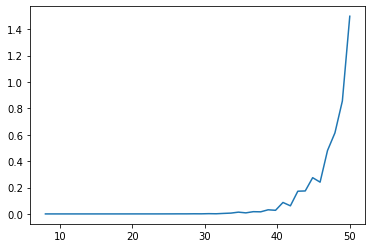

In [19]:

x_break=np.linspace(lower_range,upper_range,upper_range-lower_range)
print(x_break.shape)
print(np.array(time_array).shape)

plt.plot(x_break,time_array)
plt.show()